In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


import re
import gensim
import seaborn
import random
import os

In [2]:
EMBEDDINGLENGTH=300

In [3]:
np.random.seed(10)
tf.random.set_seed(2)
random.seed(10)
os.environ['PYTHONHASHSEED'] = str(10)

In [4]:
df_train = pd.read_csv("crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_train.tsv", sep='\t')
df_val = pd.read_csv("crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_dev.tsv", sep='\t')
df_test = pd.read_csv("crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_test.tsv", sep='\t')

In [5]:
#Dropping duplicates
df_train = df_train.drop_duplicates(subset="tweet_id")
df_val = df_val.drop_duplicates(subset="tweet_id")
df_test = df_test.drop_duplicates(subset="tweet_id")

In [6]:
#DATA VISUALISATION

In [7]:
# df1 = pd.read_csv("CrisisMMD_v2.0/annotations/california_wildfires_final_data.tsv", sep='\t')
# df2 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv", sep='\t')
# df3 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv", sep='\t')
# df4 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv", sep='\t')
# df5 = pd.read_csv("CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv", sep='\t')
# df6 = pd.read_csv("CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv", sep='\t')
# df7 = pd.read_csv("CrisisMMD_v2.0/annotations/srilanka_floods_final_data.tsv", sep='\t')

In [8]:
def barplots(barlist):
    import matplotlib.pyplot as plt
    plt.bar(['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
             , 'Mexico Earthquake', 'Srilanka Floods'], barlist ,color ='maroon')
    plt.ylabel('Number of tweets', {'color':  'purple', 'size': 18})
    plt.xlabel('Disaster', {'color':  'purple', 'size': 18})
    plt.rcParams['figure.facecolor'] = 'white'
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
             , 'Mexico Earthquake', 'Srilanka Floods']
    plt.xticks(np.arange(len(labels)), labels, rotation ='45')
    plt.rcParams["figure.figsize"] = (8,6)


In [9]:
count = df_train.groupby(['event_name']).count()
count.iloc[0]['label']

336

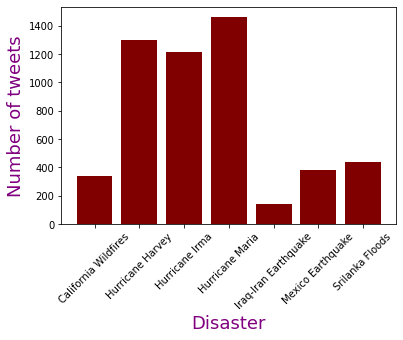

In [10]:
#There are duplicate tweets
# print("California Wildfires:\nNumber of tweets- ",df1.shape[0])
# print("\nHurricane Harvey:\nNumber of tweets- ",df2.shape[0])
# print("\nHurricane Irma:\nNumber of tweets- ",df3.shape[0])
# print("\nHurricane Maria:\nNumber of tweets- ",df4.shape[0])
# print("\nIraq-Iran Earthquake:\nNumber of tweets- ",df5.shape[0])
# print("\nMexico Earthquake:\nNumber of tweets- ",df6.shape[0])
# print("\nSrilanka Floods:\nNumber of tweets- ",df7.shape[0])

barplots([count.iloc[0]['label'],count.iloc[1]['label'],count.iloc[2]['label']
          ,count.iloc[3]['label'],count.iloc[4]['label'],count.iloc[5]['label'],count.iloc[6]['label']])

In [11]:
def barplot2(df):
    seaborn.set_theme(style="darkgrid")
    ax = seaborn.countplot(x="event_name",hue='label_text', data=df)
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
         , 'Mexico Earthquake', 'Srilanka Floods']
    ax.set_xticklabels(labels,rotation=45)
    ax.set_xlabel('Disaster Name',fontsize=20, color='blue');
    ax.set_ylabel('Text Label Counts',fontsize=20,  color='blue');




In [12]:
#barplot2(pd.concat([df_train,df_test,df_val]))

In [13]:
def tweetlength(text):
    list = text.split()
    return len(list)

In [14]:
def tweetstats(l):
    return np.array([round(sum(l)/len(l)), min(l), max(l), np.array(l).std()])

In [15]:
def rangeplots(array):
    import matplotlib.pyplot as plt
    import numpy as np

# construct some data like what you have:

    mins = array[1,:]
    maxes = array[2,:]
    means = array[0,:]
    std = array[3,:]
    
    seaborn.set_theme(style="white")

# create stacked errorbars:
    plt.errorbar(np.arange(len(mins)), means, std, fmt='ok', lw=3)
    plt.errorbar(np.arange(len(mins)), means, [means - mins, maxes - means],
             fmt='ok', ecolor='red', lw=1)
    plt.xlim(-1, len(mins))
    plt.ylabel('Tweet length (in words)', {'color':  'green', 'size': 15})
    plt.xlabel('Disaster', {'color':  'green', 'size': 15})
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
         , 'Mexico Earthquake', 'Srilanka Floods']
    plt.xticks(np.arange(len(mins)), labels, rotation ='45')
    plt.rcParams["figure.figsize"] = (8,6)
    plt.show()

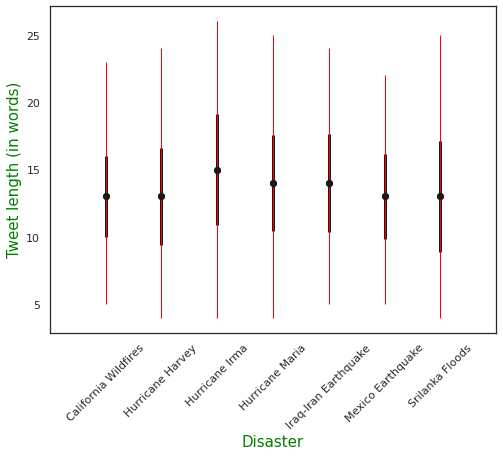

In [16]:
array = np.zeros([4,7])
l1 = df_train[df_train['event_name']=='california_wildfires'].tweet_text.apply(tweetlength)
array[:,0]=tweetstats(l1)
l2 = df_train[df_train['event_name']=='hurricane_harvey'].tweet_text.apply(tweetlength)
array[:,1]=tweetstats(l2)
l3 = df_train[df_train['event_name']=='hurricane_irma'].tweet_text.apply(tweetlength)
array[:,2]=tweetstats(l3)
l4 = df_train[df_train['event_name']=='hurricane_maria'].tweet_text.apply(tweetlength)
array[:,3]=tweetstats(l4)
l5 = df_train[df_train['event_name']=='iraq_iran_earthquake'].tweet_text.apply(tweetlength)
array[:,4]=tweetstats(l5)
l6 = df_train[df_train['event_name']=='mexico_earthquake'].tweet_text.apply(tweetlength)
array[:,5]=tweetstats(l6)
l7 = df_train[df_train['event_name']=='srilanka_floods'].tweet_text.apply(tweetlength)
array[:,6]=tweetstats(l7)
rangeplots(array)
#array=np.column_stack((l1,l2,l3,l4,l5,l6,l7))

In [17]:
df_train.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [18]:
def MatchingLabelFilter(df):
    newdf= df.loc[df['text_human'] == df['image_human']]
    newdf.reset_index(inplace = True, drop = True)
    return newdf

In [19]:
# df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
BATCHSIZE=df_train.shape[0]

In [20]:
# df.shape
#df_train

In [21]:
# df = MatchingLabelFilter(df)
# df.shape

In [22]:
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_val= df_val.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_test= df_test.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)

In [23]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

In [24]:
df_train.shape

(5263, 4)

In [25]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
#print(stop_words)

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

In [26]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [27]:
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
df_val.tweet_text = df_val.tweet_text.apply(preprocess)
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [28]:
# from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)

# def show_wordcloud(data):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         max_words=100,
#         max_font_size=30,
#         scale=3,
#         random_state=1)
   
#     wordcloud=wordcloud.generate(str(data))

#     fig = plt.figure(1, figsize=(12, 12))
#     plt.axis('off')

#     plt.imshow(wordcloud)
#     plt.show()
# string = " ".join(df.tweet_text.tolist())
# show_wordcloud(string)

In [29]:
#https://en.wikipedia.org/wiki/Word2vec#CBOW_and_skip_grams
#https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314
#https://arxiv.org/pdf/1411.2738.pdf

In [30]:
#DATARATIO=0.85

In [31]:
#df_train, df_test = train_test_split(df, test_size=1-DATARATIO, random_state=13)   #Scikit

In [32]:
#df_train.tweet_text[0]

In [33]:
#WORD2VEC

In [34]:
documents = [_text.split() for _text in df_train.tweet_text]

In [35]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [36]:
w2v_model = gensim.models.Word2Vec(vector_size=EMBEDDINGLENGTH, 
                                   window=2, 
                                   min_count=1, 
                                   workers=cores-2,
                                   sg=1)

In [37]:
w2v_model.save("w2v_model.model")  #Latest Keras used

w2v_model.build_vocab(documents)
wordvectors = w2v_model.wv    #keyed vector object
print("Vocab size:", len(wordvectors))

Vocab size: 12166


In [38]:
wordvectors.most_similar("fire")

[('readouts', 0.23107334971427917),
 ('establishing', 0.20267026126384735),
 ('conditions', 0.2018750011920929),
 ('layoff', 0.20124255120754242),
 ('mose', 0.19783173501491547),
 ('irma', 0.19780316948890686),
 ('scottlucas', 0.19589337706565857),
 ('gunning', 0.1930159628391266),
 ('jlo', 0.18958118557929993),
 ('generation', 0.18562595546245575)]

In [39]:
w2v_model.train(documents, total_examples=len(documents), epochs=50)

(2021078, 2289950)

In [40]:
wordvectors.most_similar("fire")

[('wildfire', 0.7545862197875977),
 ('dude', 0.7093076109886169),
 ('wine', 0.7061188817024231),
 ('battling', 0.6773854494094849),
 ('melbournenews', 0.6692675352096558),
 ('cannabis', 0.6676167249679565),
 ('josh', 0.6506795883178711),
 ('azfamily', 0.6485211849212646),
 ('autumn', 0.6454025506973267),
 ('fires', 0.6447423696517944)]

In [41]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_train.tweet_text)    #creates word_index dictionary based on frequency of the word

vocabularysize = len(tokenizer.word_index) + 1
print("Total words", vocabularysize)

Total words 12167


In [42]:
tokenizer.word_index

{'irma': 1,
 'hurricane': 2,
 'harvey': 3,
 'puerto': 4,
 'rico': 5,
 'maria': 6,
 'earthquake': 7,
 'mora': 8,
 'mexico': 9,
 'california': 10,
 'amp': 11,
 'help': 12,
 'hurricanemaria': 13,
 'relief': 14,
 'victims': 15,
 'tornado': 16,
 'storm': 17,
 'new': 18,
 'florida': 19,
 'wildfires': 20,
 'trump': 21,
 'via': 22,
 'fire': 23,
 'hurricaneharvey': 24,
 'still': 25,
 'news': 26,
 'us': 27,
 'iran': 28,
 'back': 29,
 'today': 30,
 'damage': 31,
 'people': 32,
 'houston': 33,
 'post': 34,
 'city': 35,
 'day': 36,
 'like': 37,
 'one': 38,
 'texas': 39,
 'power': 40,
 'tropical': 41,
 'hit': 42,
 'get': 43,
 'money': 44,
 'iraq': 45,
 '2017': 46,
 'puertorico': 47,
 'update': 48,
 'home': 49,
 'water': 50,
 'first': 51,
 'helping': 52,
 'aid': 53,
 'affected': 54,
 'love': 55,
 'video': 56,
 'business': 57,
 'could': 58,
 'rescue': 59,
 'winds': 60,
 'week': 61,
 'mexicoearthquake': 62,
 'warning': 63,
 'coast': 64,
 'track': 65,
 'path': 66,
 'watch': 67,
 'please': 68,
 'good': 6

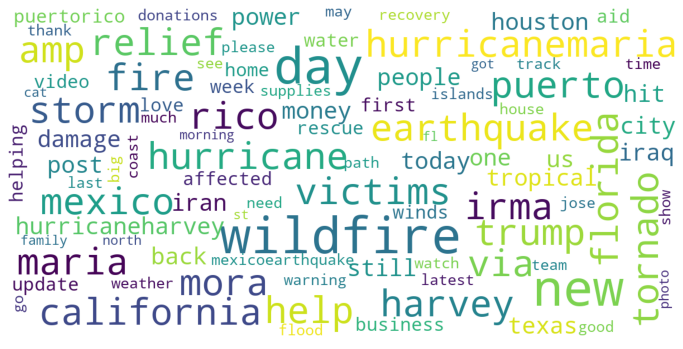

In [43]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

freqwordlist = list(tokenizer.word_index.keys())[:100]

string = " ".join(freqwordlist)
show_wordcloud(string)

In [44]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# X = w2v_model.wv[w2v_model.wv.key_to_index]
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)
# plt.rcParams["figure.figsize"] = (12,9)

# labels = list(w2v_model.wv.key_to_index.keys())

# for label, x, y in zip(labels, X_tsne[:, 0], X_tsne[:, 1]):
#     if (tokenizer.word_index[label]<200):
#         plt.scatter(x,y,color='blue')
#         plt.annotate(
#             label,
#             xy=(x, y), xytext=(-1, -1),
#             textcoords='offset points', ha='left', va='top')
# plt.title(label="t-SNE Plot of Embeddings",
#           fontsize=25,
#           color="green")
# plt.show()

In [45]:
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [46]:
df_train.tweet_text

0       kakenews california wildfires destroy 50 struc...
3       theatlantic photos california destructive wild...
4                         california wildfires worse fall
7       playing new friend chai california fire evacue...
11      ciscokid calistoga fire tubbsfire napafire abc...
                              ...                        
6121    one show tonight sir david jason joins alex jo...
6122        trump friends find puerto rico trumprapesrico
6123    song donna harvey kissed darvey perfectmoment ...
6124    atlantic hrcne season 2017 major hrcne irma ca...
6125                          ready close hurricaneharvey
Name: tweet_text, Length: 5263, dtype: object

In [47]:
def find_biggest_list(list):
    list_len = [len(i) for i in list]
    return max(list_len)

In [48]:
xtrain_sequences = tokenizer.texts_to_sequences(df_train.tweet_text)
xval_sequences = tokenizer.texts_to_sequences(df_val.tweet_text)
xtest_sequences = tokenizer.texts_to_sequences(df_test.tweet_text)
#Tokenizer skips the word if it does not know it

In [49]:
MAXSENTENCELENGTH_train = find_biggest_list(xtrain_sequences)      # sequences will only contain words identified by the tokenizer
MAXSENTENCELENGTH_val = find_biggest_list(xval_sequences)
MAXSENTENCELENGTH_test = find_biggest_list(xval_sequences)
MAXSENTENCELENGTH = max(MAXSENTENCELENGTH_train, MAXSENTENCELENGTH_val, MAXSENTENCELENGTH_test)
print(MAXSENTENCELENGTH)

20


In [50]:
xtrain_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtrain_sequences, padding="post", maxlen=MAXSENTENCELENGTH)
xval_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xval_sequences, padding="post", maxlen=MAXSENTENCELENGTH)
xtest_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtest_sequences, padding="post", maxlen=MAXSENTENCELENGTH)

In [51]:
# CATEGORICAL TO NUMERICAL ENCODING

In [52]:
# prepare input data
def One_Hot_Encoding(Y_train, Y_val, Y_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(Y_train)
    categoryarray=ohe.categories_
    Y_train_enc = ohe.transform(Y_train)
    Y_test_enc = ohe.transform(Y_test)
    Y_val_enc = ohe.transform(Y_val)
    return categoryarray, Y_train_enc, Y_val_enc, Y_test_enc

In [53]:
categoryarray, ytrain, yval, ytest = One_Hot_Encoding(np.array(df_train.label_text.to_list()).reshape(-1,1), np.array(df_val.label_text.to_list()).reshape(-1,1), np.array(df_test.label_text.to_list()).reshape(-1,1))       # Neural networks expects input values to be numerical.
ytrain = ytrain.toarray()
yval = yval.toarray()
ytest = ytest.toarray()
categoryarray

[array(['affected_individuals', 'infrastructure_and_utility_damage',
        'not_humanitarian', 'other_relevant_information',
        'rescue_volunteering_or_donation_effort'], dtype='<U38')]

In [54]:
noofcategories=len(categoryarray[0])

In [55]:
# EMBEDDING LAYER DEFINITION

In [56]:
embedding_matrix = np.zeros((vocabularysize, EMBEDDINGLENGTH))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(12167, 300)


In [57]:
embedding_layer = tf.keras.layers.Embedding(input_dim=vocabularysize,
                                            output_dim=EMBEDDINGLENGTH,
                                            weights=[embedding_matrix],
                                            input_length=MAXSENTENCELENGTH,
                                            trainable=False)

In [58]:
# MODEL BUILDING

In [59]:

model = tf.keras.models.Sequential()
model.add(embedding_layer)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
#model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(noofcategories, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 300)           3650100   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 256)           439296    
_________________________________________________________________
dropout (Dropout)            (None, 20, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 5)                 1285      
Total params: 4,484,921
Trainable params: 834,821
Non-trainable params: 3,650,100
_________________________________________________________________


In [60]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(5e-4), metrics=["accuracy"])

In [61]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=10, cooldown=1),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10)]

In [62]:
#TRAIN

In [63]:
H = model.fit(xtrain_padded_sequences, ytrain, batch_size=int(BATCHSIZE/20), epochs=50, validation_data=(xval_padded_sequences, yval), verbose=1, callbacks=callbacks)

Epoch 1/50
21/21 [==============================] - 28s 732ms/step - loss: 1.3089 - accuracy: 0.4843 - val_loss: 0.8750 - val_accuracy: 0.6723
Epoch 2/50
21/21 [==============================] - 11s 550ms/step - loss: 0.8294 - accuracy: 0.6971 - val_loss: 0.7576 - val_accuracy: 0.7114
Epoch 3/50
21/21 [==============================] - 11s 521ms/step - loss: 0.7365 - accuracy: 0.7275 - val_loss: 0.7158 - val_accuracy: 0.7234
Epoch 4/50
21/21 [==============================] - 11s 540ms/step - loss: 0.7263 - accuracy: 0.7275 - val_loss: 0.6573 - val_accuracy: 0.7475
Epoch 5/50
21/21 [==============================] - 11s 548ms/step - loss: 0.6677 - accuracy: 0.7489 - val_loss: 0.6829 - val_accuracy: 0.7415
Epoch 6/50
21/21 [==============================] - 12s 580ms/step - loss: 0.6311 - accuracy: 0.7685 - val_loss: 0.6579 - val_accuracy: 0.7455
Epoch 7/50
21/21 [==============================] - 12s 580ms/step - loss: 0.6452 - accuracy: 0.7557 - val_loss: 0.6581 - val_accuracy: 0.7425

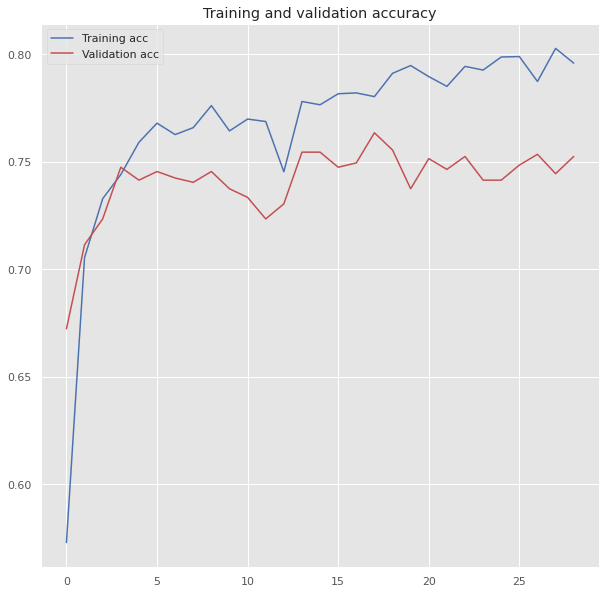

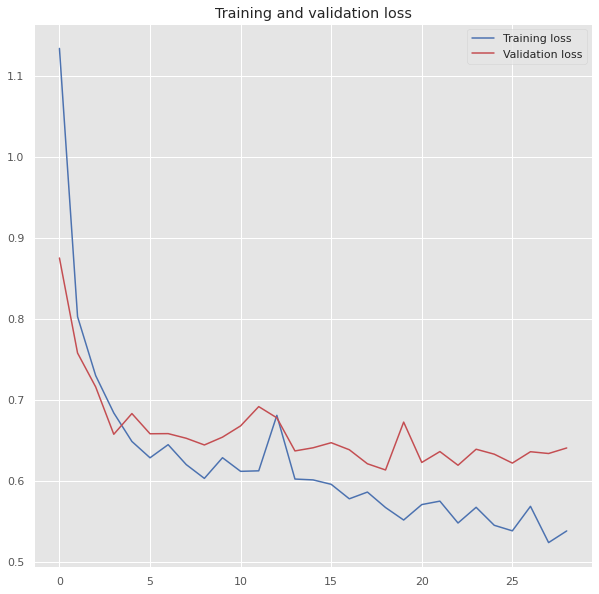

In [64]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
 
epochs = range(len(acc))

plt.style.use("ggplot")
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.rcParams["figure.figsize"] = (5,4)
plt.show()

In [65]:
#TESTING

In [66]:
%%time
score = model.evaluate(xtest_padded_sequences, ytest, batch_size=1024)

print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 0s 351ms/step - loss: 0.6252 - accuracy: 0.7581
ACCURACY: 0.7581151723861694
LOSS: 0.6252354979515076
CPU times: user 1.79 s, sys: 76.9 ms, total: 1.87 s
Wall time: 370 ms


In [67]:
def singletweetprediction(tweettext, categoryarray):
    wordstring = preprocess(tweettext)
    tokenisedwordlist = tokenizer.texts_to_sequences([wordstring])
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(tokenisedwordlist, padding="post", maxlen=MAXSENTENCELENGTH)
    
#     print(wordstring)
#     print(padded_sequences)
    
    score = model.predict(padded_sequences, batch_size=int(BATCHSIZE/20))    # Score is the probability output of the last layer
    
    x=np.argmax(score[0])
    
    return categoryarray[0][x]

In [68]:
print(singletweetprediction("building d damage fire", categoryarray))

infrastructure_and_utility_damage


In [69]:
score = model.predict(xtest_padded_sequences, batch_size=int(BATCHSIZE/20))    # Score is the probability output of the last layer

y_pred=[]
for i in score:
    y_pred.append(categoryarray[0][np.argmax(i)])
    
y_true = df_test.label_text.tolist()
# categoryarray

In [70]:
# plt.figure(figsize=(12,12))
# plt.hist(y_true)
# y_true.count('other_relevant_information')

In [71]:
# plt.figure(figsize=(12,12))
# plt.hist(y_pred)

In [72]:
cmatrix = confusion_matrix(y_true, y_pred, labels=categoryarray[0])
np.set_printoptions(precision=2)

In [73]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap='Oranges',
                          normalize=False):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,
          fontsize=20,
          color="green")
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=12)
        plt.yticks(tick_marks, target_names, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.0 if normalize else cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label',fontsize=18, color='maroon')
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass),fontsize=18, color='maroon')
    plt.rcParams["figure.figsize"] = (8,8)
    plt.rcParams.update({'font.size': 16})
    plt.show()

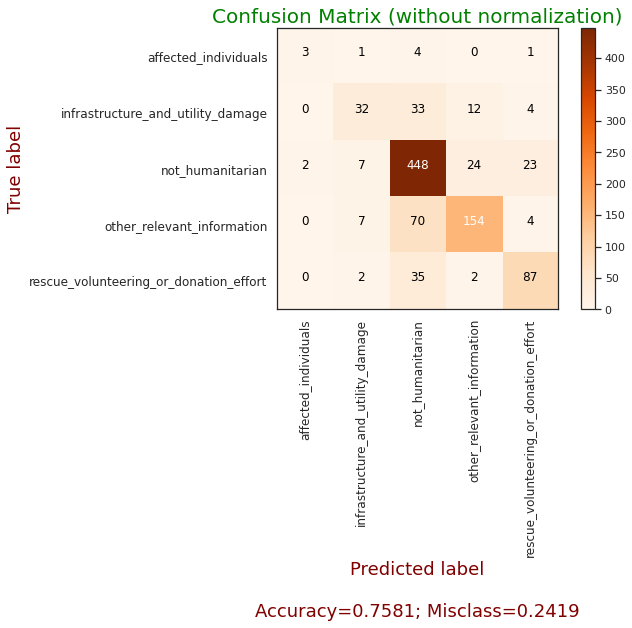

In [74]:
seaborn.set_theme(style="white")
plot_confusion_matrix(cmatrix, categoryarray[0], title='Confusion Matrix (without normalization)')


In [75]:
print(classification_report(y_true, y_pred, digits=4))

                                        precision    recall  f1-score   support

                  affected_individuals     0.6000    0.3333    0.4286         9
     infrastructure_and_utility_damage     0.6531    0.3951    0.4923        81
                      not_humanitarian     0.7593    0.8889    0.8190       504
            other_relevant_information     0.8021    0.6553    0.7213       235
rescue_volunteering_or_donation_effort     0.7311    0.6905    0.7102       126

                              accuracy                         0.7581       955
                             macro avg     0.7091    0.5926    0.6343       955
                          weighted avg     0.7556    0.7581    0.7492       955

